In [1]:
holidays = [
    2, 2, 2, 2, 2, 2, 3, 2, 3, 2,
    2, 2, 2, 2, 2, 3, 3, 3, 2, 2,
    2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
    2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
    3, 2, 2, 3, 2, 2, 2, 2, 3, 3,
    2, 3
    ]

In [17]:
import pandas as pd
data = []
column_names = ['Weekly rank', 'Title', 'Country', 'Director', 'Distributor', 'Screens (week)', 'Gross revenue (week)', 'Tickets (week)', 'Screens (all-time)', 'Gross revenue (all-time)', 'Tickets (all-time)', 'Days since premiere']
for i in range(52): 
    df = pd.read_excel('sources/icadata/rankings_2017.xlsx', sheet_name = 'ACUMULADOS', header = None, skiprows = 6 + i * 27, nrows = 20, names=column_names, index_col=None)
    df['Week'] = i+1
    df['Holidays'] = holidays[i]
    data.append(df)


In [27]:
from IPython.display import display
portugal_df = pd.concat(data, ignore_index=True)
portugal_df = portugal_df.sort_values(["Title", "Week"])


,Weekly rank,Title,Country,Director,Distributor,Screens (week),Gross revenue (week),Tickets (week),Screens (all-time),Gross revenue (all-time),Tickets (all-time),Days since premiere,Week,Holidays
265,6,100 Metros,Big Picture 2 Films,Marcel Barrena,"Portugal, Espanha",36,44517.86,8472,37,44517.86,9250,7,14,2
290,11,100 Metros,Big Picture 2 Films,Marcel Barrena,"PT, ES",37,23555.68,4448,60,69089.44,13915,14,15,2
312,13,100 Metros,Big Picture 2 Films,Marcel Barrena,"PT, ES",25,9600.53,1769,81,78729.22,15690,21,16,3
997,18,120 Batimentos Por Minuto,Midas Filmes,Robin Campillo,FR,10,8967.13,1777,11,8967.13,2136,7,50,3
990,11,24 Horas Para Viver,NOS Lusomundo Audiovisuais,Brian Smrz,"HK, ZA",20,38442.45,7172,20,38442.45,7172,7,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,6,xXx: O Regresso de Xander Cage,NOS Lusomundo Audiovisuais,D. J. Caruso,EUA,57,95129.25,18053,210,816583.14,148490,28,7,3
151,12,xXx: O Regresso de Xander Cage,NOS Lusomundo Audiovisuais,D. J. Caruso,EUA,29,33725.89,6353,234,851464.93,155141,35,8,2
175,16,xXx: O Regresso de Xander Cage,NOS Lusomundo Audiovisuais,D. J. Caruso,EUA,20,26459.39,5190,241,877930.82,160333,42,9,3
708,9,Índice Médio de Felicidade,Big Picture 2 Films,Joaquim Leitão,PT,42,26652.40,4958,44,26652.40,5863,7,36,2


In [19]:
import matplotlib.pyplot as plt

In [56]:
portugal_df["Weekly change (revenue)"] = portugal_df.groupby("Title")["Gross revenue (week)"].pct_change()
portugal_df["Weekly change (no. of screens)"] = portugal_df.groupby("Title")["Screens (week)"].diff()
display(portugal_df)


,Weekly rank,Title,Country,Director,Distributor,Screens (week),Gross revenue (week),Tickets (week),Screens (all-time),Gross revenue (all-time),Tickets (all-time),Days since premiere,Week,Holidays,Weekly drop (revenue),Weekly drop (no. of screens),Weekly change (revenue),Weekly change (no. of screens)
265,6,100 Metros,Big Picture 2 Films,Marcel Barrena,"Portugal, Espanha",36,44517.86,8472,37,44517.86,9250,7,14,2,NaN,NaN,NaN,NaN
290,11,100 Metros,Big Picture 2 Films,Marcel Barrena,"PT, ES",37,23555.68,4448,60,69089.44,13915,14,15,2,-0.470871,1.0,-0.470871,1.0
312,13,100 Metros,Big Picture 2 Films,Marcel Barrena,"PT, ES",25,9600.53,1769,81,78729.22,15690,21,16,3,-0.592432,-12.0,-0.592432,-12.0
997,18,120 Batimentos Por Minuto,Midas Filmes,Robin Campillo,FR,10,8967.13,1777,11,8967.13,2136,7,50,3,NaN,NaN,NaN,NaN
990,11,24 Horas Para Viver,NOS Lusomundo Audiovisuais,Brian Smrz,"HK, ZA",20,38442.45,7172,20,38442.45,7172,7,50,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,6,xXx: O Regresso de Xander Cage,NOS Lusomundo Audiovisuais,D. J. Caruso,EUA,57,95129.25,18053,210,816583.14,148490,28,7,3,-0.296256,-14.0,-0.296256,-14.0
151,12,xXx: O Regresso de Xander Cage,NOS Lusomundo Audiovisuais,D. J. Caruso,EUA,29,33725.89,6353,234,851464.93,155141,35,8,2,-0.645473,-28.0,-0.645473,-28.0
175,16,xXx: O Regresso de Xander Cage,NOS Lusomundo Audiovisuais,D. J. Caruso,EUA,20,26459.39,5190,241,877930.82,160333,42,9,3,-0.215458,-9.0,-0.215458,-9.0
708,9,Índice Médio de Felicidade,Big Picture 2 Films,Joaquim Leitão,PT,42,26652.40,4958,44,26652.40,5863,7,36,2,NaN,NaN,NaN,NaN


In [85]:
features_df = portugal_df.loc[:,['Weekly change (revenue)', 'Title', 'Weekly change (no. of screens)', 'Days since premiere', 'Holidays']]
features_df = features_df.dropna()
display(features_df)
features_df.to_csv('features.csv')


,Weekly change (revenue),Title,Weekly change (no. of screens),Days since premiere,Holidays
290,-0.470871,100 Metros,1.0,14,2
312,-0.592432,100 Metros,-12.0,21,3
1014,-0.615807,24 Horas Para Viver,0.0,14,2
652,-0.478574,2:22 - Hora Fatídica,0.0,14,3
677,-0.726159,2:22 - Hora Fatídica,-11.0,21,2
...,...,...,...,...,...
103,-0.372654,xXx: O Regresso de Xander Cage,-10.0,21,2
125,-0.296256,xXx: O Regresso de Xander Cage,-14.0,28,3
151,-0.645473,xXx: O Regresso de Xander Cage,-28.0,35,2
175,-0.215458,xXx: O Regresso de Xander Cage,-9.0,42,3


PermissionError: [Errno 13] Permission denied: 'features.csv'

In [86]:
revenue_change = features_df.sort_values('Weekly change (revenue)')
revenue_change.to_csv('revenue_change.csv')

In [58]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = features_df.loc[:,['Weekly change (no. of screens)', 'Days since premiere', 'Holidays']]
Y = features_df["Weekly change (revenue)"]

LinearRegression()

In [69]:
Y.shape

(746,)

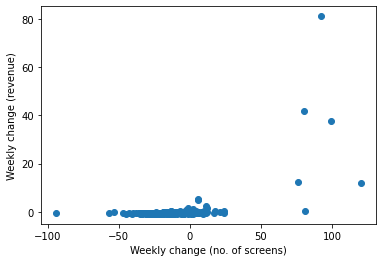

Spearman correlation:  0.4464331334074022


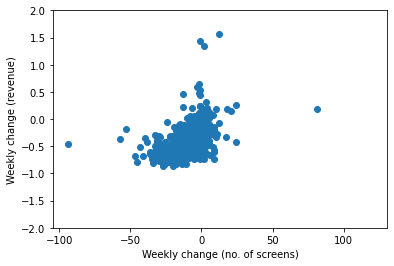

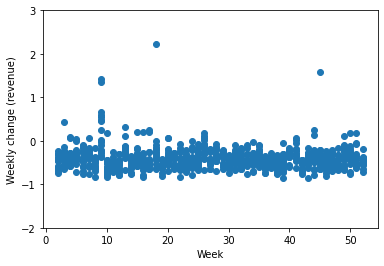

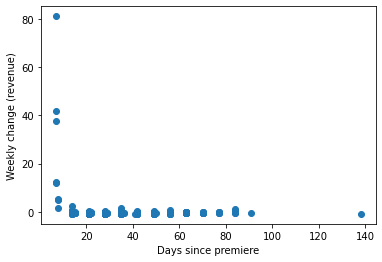

Spearman correlation:  -0.12752298925309907


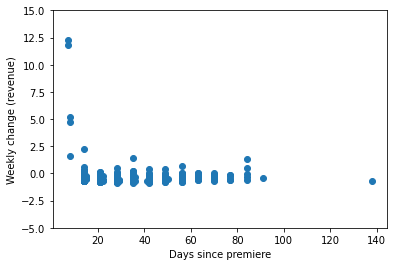

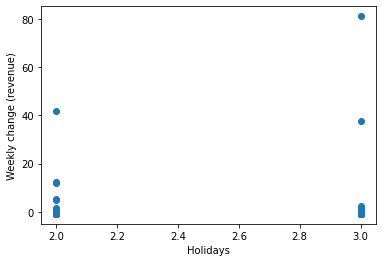

Spearman correlation:  0.15932824313163443


In [101]:
from scipy import stats


x = features_df["Weekly change (no. of screens)"]
plt.xlabel('Weekly change (no. of screens)')
plt.ylabel('Weekly change (revenue)')
y = features_df["Weekly change (revenue)"]
plt.plot(x,y, marker='o', linestyle='None')
plt.show()
rho, pval = stats.spearmanr(x,y)
print("Spearman correlation: ", rho)


x = features_df["Weekly change (no. of screens)"]
plt.xlabel('Weekly change (no. of screens)')
plt.ylabel('Weekly change (revenue)')
y = features_df["Weekly change (revenue)"]
axes = plt.gca()
axes.set_ylim([-2,2])
plt.plot(x,y, marker='o', linestyle='None')
plt.show()

x = portugal_df["Week"]
plt.xlabel('Week')
plt.ylabel('Weekly change (revenue)')
y = portugal_df["Weekly change (revenue)"]
axes = plt.gca()
axes.set_ylim([-2,3])
plt.plot(x,y, marker='o', linestyle='None')
plt.show()


x = features_df["Days since premiere"]
plt.xlabel('Days since premiere')
plt.ylabel('Weekly change (revenue)')
y = features_df["Weekly change (revenue)"]
plt.plot(x,y, marker='o', linestyle='None')
plt.show()
rho, pval = stats.spearmanr(x,y)
print("Spearman correlation: ", rho)


x = features_df["Days since premiere"]
plt.xlabel('Days since premiere')
plt.ylabel('Weekly change (revenue)')
y = features_df["Weekly change (revenue)"]
axes = plt.gca()
axes.set_ylim([-5,15])
plt.plot(x,y, marker='o', linestyle='None')
plt.show()


x = features_df["Holidays"]
plt.xlabel('Holidays')
plt.ylabel('Weekly change (revenue)')
y = features_df["Weekly change (revenue)"]
plt.plot(x,y, marker='o', linestyle='None')
plt.show()
rho, pval = stats.spearmanr(x,y)
print("Spearman correlation: ", rho)


#features_df.loc[:,['Weekly change (no. of screens)', 'Days since premiere', 'Holidays']]




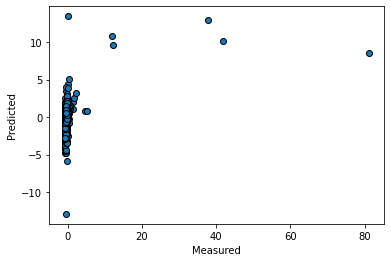

In [106]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt3

lr = linear_model.LinearRegression()


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, Y, cv=10)

fig, ax = plt3.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
#ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt3.show()

In [108]:
import sklearn.metrics
metrics.max_error(Y, predicted)

72.55537890748417

In [110]:
metrics.explained_variance_score(Y, predicted)

0.16626663551613363

In [111]:
metrics.mean_squared_error(Y, predicted)

11.470785613867305

In [112]:
metrics.r2_score(Y, predicted)

0.16626632378812944